In [1]:
import pandas as pd
import numpy as np

In [2]:
imdb=pd.read_csv("E:/Dataset/IMDB dataset/IMDB Dataset.csv")
imdb.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
"""
Introduction:
    
Lowercasing
Remove HTML tags 
Remove URLs
Remove Punctiouation
Chat word treatment
Spelling Correction
Removing Stop words
Handling Emojis
Tokenization
Stemming
Lemmatization
"""

'\nIntroduction:\n    \nLowercasing\nRemove HTML tags \nRemove URLs\nRemove Punctiouation\nChat word treatment\nSpelling Correction\nRemoving Stop words\nHandling Emojis\nTokenization\nStemming\nLemmatization\n'

In [4]:
imdb['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

# Lower Casing

In [5]:

# python is a case sensative it treats Basically and basically as different words

In [6]:
#a string into lower case
imdb['review'][3].lower() 

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [7]:
#for corpus/dataset

imdb['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

# Removing HTML tags


In [8]:
#using Regex 
#regex101.com 

In [9]:
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'', text)

In [10]:
text="basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [11]:
remove_html_tags(text)

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [12]:
#doing it for the dataset
imdb['review'].apply(remove_html_tags)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Remove URLS 


In [13]:
#using Regex

In [14]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [15]:
text1=" check this link contain the dataset used in the practice   https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews"
text2="this is another video for learning nlp   https://www.youtube.com/watch?v=hKK59rfpXL0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=10"

In [16]:
remove_url(text1)

' check this link contain the dataset used in the practice   '

In [17]:
remove_url(text2)

'this is another video for learning nlp   '

In [18]:
# remove_url(imdb)

# Removing Punctuation

In [19]:
"""
if punctuations are not removed it can act like a word for example ! it will be treated as a word. It does not effect the
document but it will have some extra space in the document
"""

'\nif punctuations are not removed it can act like a word for example ! it will be treated as a word. It does not effect the\ndocument but it will have some extra space in the document\n'

In [20]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
exclude=string.punctuation

In [22]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,"")
    return text

In [23]:
text="string, with puncturations? "

In [24]:
remove_punc(text)

'string with puncturations '

In [25]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [26]:
remove_punc1(text)

'string with puncturations '

In [27]:
text22=imdb['review']
remove_punc(text22)


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [28]:
text22

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [29]:
imdb

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

# Chat Word Treatment

In [30]:
text ="""
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA?	Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
TFW – That feeling when. TFW internet slang often goes in a caption to an image.
MFW – My face when
MRW – My reaction when
IFYP – I feel your pain
LOL – Laughing out loud
TNTL – Trying not to laugh
JK – Just kidding
IDC – I don’t care
ILY – I love you
IMU – I miss you
ADIH – Another day in hell
IDC – I don’t care
ZZZ – Sleeping, bored, tired
WYWH – Wish you were here
TIME – Tears in my eyes
BAE – Before anyone else
FIMH – Forever in my heart
BSAAW – Big smile and a wink
BWL – Bursting with laughter
LMAO – Laughing my a** off
BFF: Best friends forever
CSL – Can’t stop laughing
"""

In [31]:
text

"\nAFAIK=As Far As I Know\nAFK=Away From Keyboard\nASAP=As Soon As Possible\nATK=At The Keyboard\nATM=At The Moment\nA3=Anytime, Anywhere, Anyplace\nBAK=Back At Keyboard\nBBL=Be Back Later\nBBS=Be Back Soon\nBFN=Bye For Now\nB4N=Bye For Now\nBRB=Be Right Back\nBRT=Be Right There\nBTW=By The Way\nB4=Before\nB4N=Bye For Now\nCU=See You\nCUL8R=See You Later\nCYA=See You\nFAQ=Frequently Asked Questions\nFC=Fingers Crossed\nFWIW=For What It's Worth\nFYI=For Your Information\nGAL=Get A Life\nGG=Good Game\nGN=Good Night\nGMTA=Great Minds Think Alike\nGR8=Great!\nG9=Genius\nIC=I See\nICQ=I Seek you (also a chat program)\nILU=ILU: I Love You\nIMHO=In My Honest/Humble Opinion\nIMO=In My Opinion\nIOW=In Other Words\nIRL=In Real Life\nKISS=Keep It Simple, Stupid\nLDR=Long Distance Relationship\nLMAO=Laugh My A.. Off\nLOL=Laughing Out Loud\nLTNS=Long Time No See\nL8R=Later\nMTE=My Thoughts Exactly\nM8=Mate\nNRN=No Reply Necessary\nOIC=Oh I See\nPITA=Pain In The A..\nPRT=Party\nPRW=Parents Are Watch

In [32]:
lines = text.strip().split('\n')
abbreviations = {}
for line in lines:
    abbr, meaning = line.split('=')
    abbreviations[abbr] = meaning

# Print the dictionary
print(abbreviations)

ValueError: not enough values to unpack (expected 2, got 1)

In [33]:
def chat_converter(text):
    new_text=[]
    for w in word.split():
        if w.upper() in chat_words:
            new_text.append(chat.words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

# Spelling Correction

In [34]:
from textblob import TextBlob

In [35]:
incorrect_text="certan condition durings several gneration are modifie in the sams maner"

In [36]:
textBlb=TextBlob(incorrect_text)
textBlb.correct().string

'certain condition durings several generation are modified in the same manner'

# Removing Stop words

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
def remove_stopwords(text):
    new_text=[]
    
    for word in text.split():
        if word in stopword.words('english')
        new_text.append(' ')
        else:
            new_text.append(word)

SyntaxError: expected ':' (113049764.py, line 5)

# Handling Emojis

In [32]:
"""
we have two options:
    -we remove the emoji
    -we replace the emoji with the meaning of emoji in form of text
    
"""

'\nwe have two options:\n    -we remove the emoji\n    -we replace the emoji with the meaning of emoji in form of text\n    \n'

In [34]:
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u'\U0001F604'
                             u'\U+1F60E'
                             
                             "]+", flags=re.UNICODE
                            )
    return emoji_pattern.sub(r'',text)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-6: truncated \UXXXXXXXX escape (1663142386.py, line 7)

In [64]:
remove_emoji("hey 😎")

'hey 😎'

Replace the emoji with its meaning

In [39]:
import emoji
print(emoji.demojize('hey 😎'))

hey :smiling_face_with_sunglasses:


# Preprocessing

## 1. Word Tokenization

In [42]:
sent1="I am going to get my book from the library"
sent1.split()

['I', 'am', 'going', 'to', 'get', 'my', 'book', 'from', 'the', 'library']

In [67]:
sent2="I am going to get my book from the library. If you'r free you can join me. Ali is also joining me."
sent2.split('.')

['I am going to get my book from the library',
 " If you'r free you can join me",
 ' Ali is also joining me',
 '']

In [44]:
# split function fails in difficult senario so it can't be used. If we have a sentenece seperating ? then the sent2 example fails 

# 2. Regular Expressions

In [45]:
import re
sent3="I am going to Lahore"
tokens=re.findall("[\w']+",sent3)
tokens

['I', 'am', 'going', 'to', 'Lahore']

In [46]:
#you have to find different kinds of pattern to find different things 

### NLTK

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [48]:
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'get', 'my', 'book', 'from', 'the', 'library']

In [49]:
word_tokenize(sent2)

['I',
 'am',
 'going',
 'to',
 'get',
 'my',
 'book',
 'from',
 'the',
 'library',
 '.',
 'If',
 'you',
 'are',
 'free',
 'you',
 'can',
 'join',
 'me',
 '.',
 'Ali',
 'is',
 'also',
 'joining',
 'me',
 '.']

### Spacy

In [68]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [69]:
doc1=nlp(sent1)
doc2=nlp(sent2)

In [70]:
print(doc1)
print(doc2)

I am going to get my book from the library
I am going to get my book from the library. If you'r free you can join me. Ali is also joining me.


In [71]:
for token in doc2:
    print(token)

I
am
going
to
get
my
book
from
the
library
.
If
you'r
free
you
can
join
me
.
Ali
is
also
joining
me
.


# Stemming

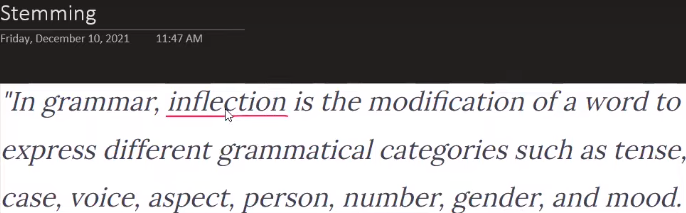

In [72]:
from nltk.stem.porter import PorterStemmer

In [99]:
ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [111]:
word1='unpredictable'
w2='unseen'
w3='beautiful'
sent='Quick brown fox jumped at the sleeping dog'
sent2='the babies are walking on the mattress laying on the floor'
para='I am pleased to announce that you have been selected for the AntonX Internship Program. Your start date is December 5th. Kindly ensure your presence between 9:30-9:45 am. The necessary documents for submission include your CNIC and original,photocopied degree and transcript. Congratulations, and we look forward to welcoming you to the team!'

In [114]:
print(stem_words(word1))
print(stem_words(w2))
print(stem_words(w3))
print(stem_words(sent))
print(stem_words(sent2))
print("Paragraph: "+stem_words(para))

unpredict
unseen
beauti
quick brown fox jump at the sleep dog
the babi are walk on the mattress lay on the floor
Paragraph: i am pleas to announc that you have been select for the antonx internship program. your start date is decemb 5th. kindli ensur your presenc between 9:30-9:45 am. the necessari document for submiss includ your cnic and original,photocopi degre and transcript. congratulations, and we look forward to welcom you to the team!


# Lemmatization

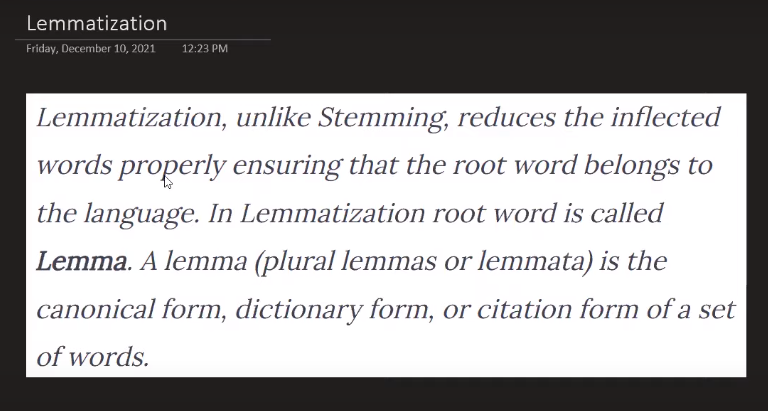

In [116]:
import nltk

In [117]:
from nltk.stem import WordNetLemmatizer

In [118]:
lemma=WordNetLemmatizer()